# Ocorrências 2010 - 2020

##Importação das bibliotecas básicas

In [1]:
pip install pandera

     |████████████████████████████████| 162 kB 5.3 MB/s 
     |████████████████████████████████| 234 kB 43.1 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
     |████████████████████████████████| 636 kB 38.1 MB/s 
     |████████████████████████████████| 245 kB 63.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for petl: filename=petl-1.7.4-py3-none-any.whl size=217001 sha256=d76f2982ce4dd10d35b9a90712f7248634aeaa80dae511daf262bf0388020bbe
  Stored in directory: /root/.cache/pip/wheels/75/23/fb/a0e8e350a8718579b0cde55163df77b94de835d7d116388fa5
  Created wheel for simpleeval: filename=simpleeval-0.9.10-py3-none-any.whl size=13769 sha256=59a8f51192870bf0da02f8f3b66b18971a30b770abde26540da3fa51a187879e
  Stored in directory: /root/.cache/pip/wheels/d4/aa/50/0b420d1eabad3c16a82368935c6a2050955bc3ee2a11ee4e06
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-

In [42]:
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use("seaborn")

## Base de dados

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/Fundamentos de ETL com Python/Base de Dados/ocorrencia_2010_2020.csv", sep=";", parse_dates=["ocorrencia_dia"], dayfirst=True)

In [4]:
df.head(10)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
5,39807,39807,INCIDENTE,SALVADOR,BA,****,2010-01-06,17:53:00,0
6,40215,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,****,2010-01-09,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
9,39711,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,****,2010-01-10,20:00:00,0


In [5]:
schema = pa.DataFrameSchema(
    columns = {
        "codigo_ocorrencia":pa.Column(pa.Int),
        "codigo_ocorrencia2":pa.Column(pa.Int),
        "ocorrencia_classificacao":pa.Column(pa.String),
        "ocorrencia_cidade":pa.Column(pa.String),
        "ocorrencia_uf":pa.Column(pa.String, pa.Check.str_length(2,2)),
        "ocorrencia_aerodromo":pa.Column(pa.String),
        "ocorrencia_dia":pa.Column(pa.DateTime),
        "ocorrencia_hora":pa.Column(pa.String, pa.Check.str_matches("([0-1]?[0-9]|[2][0-3]):([0-5][0-9])(:[0-5][0-9])?$"), nullable=True),
        "total_recomendacoes":pa.Column(pa.Int)
    }
)

In [6]:
schema.validate(df)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,****,2020-12-31,09:00:00,0


In [7]:
df.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dtype: object

In [8]:
df.ocorrencia_dia.dt.month

0        1
1        1
2        1
3        1
4        1
        ..
5747    12
5748    12
5749    12
5750    12
5751    12
Name: ocorrencia_dia, Length: 5752, dtype: int64

## Limpeza de Dados

In [9]:
df.head()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0


In [10]:
# Limpando os dados com valores em: "****", "###!", "####", "**", "*****", "NULL"

df.replace(["****", "###!", "####", "**", "*****", "NULL"], pd.NA, inplace=True)

In [11]:
df.head(20)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
5,39807,39807,INCIDENTE,SALVADOR,BA,<NA>,2010-01-06,17:53:00,0
6,40215,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,<NA>,2010-01-09,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
9,39711,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,<NA>,2010-01-10,20:00:00,0


In [12]:
df.isna().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [13]:
# Trocando o valor NA para 0

df.fillna(0, inplace=True)

In [14]:
df.isnull().sum()

codigo_ocorrencia           0
codigo_ocorrencia2          0
ocorrencia_classificacao    0
ocorrencia_cidade           0
ocorrencia_uf               0
ocorrencia_aerodromo        0
ocorrencia_dia              0
ocorrencia_hora             0
total_recomendacoes         0
dtype: int64

In [15]:
df.head()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,0,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,0,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0


In [16]:
df.dropna()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,0,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,0,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,0,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,0,2020-12-31,09:00:00,0


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,0,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,0,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,0,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,0,2020-12-31,09:00:00,0


## Transformando Valores Ausentes

In [19]:
valores_ausentes = ['**','###!','####','****','*****','NULL']
df2 = pd.read_csv("/content/drive/MyDrive/Data Science/Fundamentos de ETL com Python/Base de Dados/ocorrencia_2010_2020.csv", sep=";", parse_dates=['ocorrencia_dia'], dayfirst=True, na_values=valores_ausentes)
df2.head(10)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
5,39807,39807,INCIDENTE,SALVADOR,BA,NaN,2010-01-06,17:53:00,0
6,40215,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
9,39711,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,NaN,2010-01-10,20:00:00,0


In [20]:
schema = pa.DataFrameSchema(
    columns = {
        "codigo_ocorrencia": pa.Column(pa.Int),
        "codigo_ocorrencia2": pa.Column(pa.Int),
        "ocorrencia_classificacao": pa.Column(pa.String),
        "ocorrencia_cidade": pa.Column(pa.String),
        "ocorrencia_uf": pa.Column(pa.String, pa.Check.str_length(2,2), nullable=True),
        "ocorrencia_aerodromo": pa.Column(pa.String, nullable=True),
        "ocorrencia_dia": pa.Column(pa.DateTime),
        "ocorrencia_hora": pa.Column(pa.String, pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9])(:[0-5][0-9])?$'), nullable=True),
        "total_recomendacoes": pa.Column(pa.Int)   
    }
)

In [21]:
schema.validate(df2)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,NaN,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,NaN,2020-12-31,09:00:00,0


In [22]:
df2.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dtype: object

In [23]:
filtro = df2.ocorrencia_uf.isnull()
df2.loc[filtro]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2227,49474,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,NaN,NaN,2013-09-02,02:54:00,0


In [24]:
filtro = df2.ocorrencia_aerodromo.isnull()
df2.loc[filtro]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0
5,39807,39807,INCIDENTE,SALVADOR,BA,NaN,2010-01-06,17:53:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
9,39711,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,NaN,2010-01-10,20:00:00,0
...,...,...,...,...,...,...,...,...,...
5741,79754,79754,INCIDENTE GRAVE,NOVA MARINGÁ,MT,NaN,2020-12-28,13:00:00,0
5744,79753,79753,INCIDENTE GRAVE,GOIATUBA,GO,NaN,2020-12-29,12:00:00,0
5745,79755,79755,ACIDENTE,MATO RICO,PR,NaN,2020-12-29,10:30:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,NaN,2020-12-30,18:30:00,0


In [25]:
filtro = df2.ocorrencia_hora.isnull()
df2.loc[filtro]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
4100,78823,78823,INCIDENTE,CORUMBÁ,MS,NaN,2017-07-09,NaN,0


In [26]:
df2.count()

codigo_ocorrencia           5752
codigo_ocorrencia2          5752
ocorrencia_classificacao    5752
ocorrencia_cidade           5752
ocorrencia_uf               5751
ocorrencia_aerodromo        3403
ocorrencia_dia              5752
ocorrencia_hora             5751
total_recomendacoes         5752
dtype: int64

In [27]:
#ocorrências com mais de 10 recomendações

filtro = df2.total_recomendacoes > 10
df2.loc[filtro]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
63,39992,39992,ACIDENTE,SÃO PAULO,SP,SBMT,2010-02-17,20:07:00,11
326,42250,42250,ACIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-08-12,12:26:00,19
530,43471,43471,ACIDENTE,SÃO PAULO,SP,NaN,2010-12-14,20:15:00,11
727,44377,44377,ACIDENTE,ITÁPOLIS,SP,SDIO,2011-04-09,14:50:00,11
872,44796,44796,ACIDENTE,RECIFE,PE,SBRF,2011-07-13,09:54:00,23
884,44888,44888,INCIDENTE GRAVE,SÃO JOSÉ DOS PINHAIS,PR,SBCT,2011-07-15,17:05:00,11
1062,45554,45554,INCIDENTE GRAVE,UBERLÂNDIA,MG,SBUL,2011-11-15,02:15:00,20
1972,47938,47938,INCIDENTE,BRASÍLIA,DF,SBBR,2013-04-13,18:00:00,11
2795,52265,52265,ACIDENTE,SANTOS,SP,NaN,2014-08-13,13:03:00,13
3930,66432,66432,INCIDENTE GRAVE,VITÓRIA,ES,NaN,2017-02-21,11:47:00,12


## Visualização dos Dados

In [28]:
df.describe()

,codigo_ocorrencia,codigo_ocorrencia2,total_recomendacoes
count,5752.000000,5752.000000,5752.000000
mean,58504.211926,58504.211926,0.303894
std,14060.291611,14060.291611,1.153253
min,39115.000000,39115.000000,0.000000
25%,46366.500000,46366.500000,0.000000
50%,52692.500000,52692.500000,0.000000
75%,77653.750000,77653.750000,0.000000
max,79874.000000,79874.000000,23.000000


### Grafico de Ocorrencia/Dia

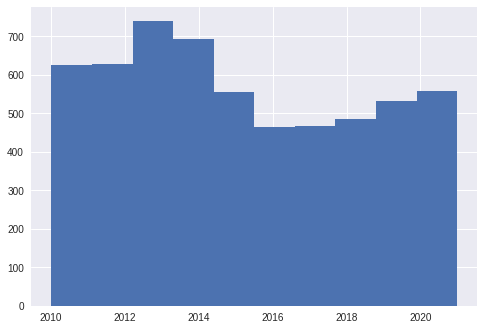

In [40]:
plt.hist(df["ocorrencia_dia"]);

### Quantidade de indicações por estado

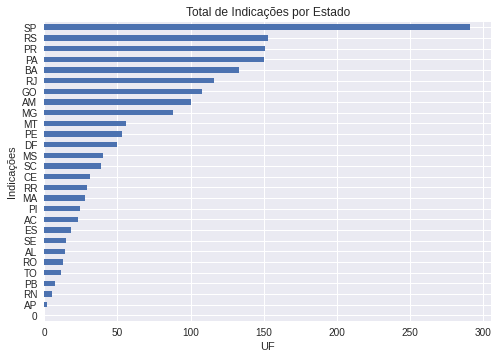

In [34]:
df.groupby("ocorrencia_uf")["total_recomendacoes"].sum().sort_values(ascending=True).plot.barh(title="Total de Indicações por Estado")
plt.xlabel("UF")
plt.ylabel("Indicações");

### Classificação total por UF

In [48]:
px.scatter_3d(df, x = "total_recomendacoes", y = "ocorrencia_uf", z ="ocorrencia_classificacao",   color="ocorrencia_uf")

### Total Geral

In [44]:
grafico = px.scatter_matrix(df, dimensions=["ocorrencia_dia", "ocorrencia_hora", "ocorrencia_classificacao", "total_recomendacoes", "ocorrencia_uf"], color="total_recomendacoes")
grafico.show()